In [62]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 16:57:07 2021

@author: poorvajuneja
"""
import random
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt


 

class TreatmentTrial(object):
    '''
    this class will take an input of N sample size 
    for each sample according to set probability will determine 
    if the pig gets infected or not for both
    control group (untreated) and treatment group(treated)
    then will return an observed value by subtracted mean from each group
    
    
    '''
    
    def __init__(self,N):
        self.N = N

    
    def treated_prob(self):
         treated_n = []
         for i in range(self.N):
              infection_probability = np.random.random()
              if infection_probability <= 0.1:
                  treated_n.append(1)
              else:
                  treated_n.append(0)
                  
         treated_N = np.array(treated_n)
         return treated_N
                  
          
    def untreated_prob(self):
         untreated_n = []
         for i in range(self.N):
              infection_probability = np.random.random()
              if infection_probability <= 0.5:
                  untreated_n.append(1)
              else:
                  untreated_n.append(0)
                  
         untreated_N = np.array(untreated_n)
         return untreated_N


    def observedStat(self,treated_N,untreated_N):
        
        observed_statValue = abs(treated_N.mean() - untreated_N.mean())
        return observed_statValue
        




# need to sample two random subdivisions multiple times
class randomTrials:
    '''
    this class is to compute random statistics value by
    bootstraping the data of treatment and control group
    '''
    
    def __init__(self, group_one, group_two):
        self.n_one = group_one.size # number of samples in group one
        self.n_two = group_two.size # same for group two
        self.n_all = self.n_one + self.n_two # size of the data
        self.all = np.concatenate((group_one, group_two), axis=0) # merged data
        
    def generate_random_split(self):
        temp = self.all.copy() # copy to avoid corruption by user
        np.random.shuffle(temp) # now the columns are shuffled
        go = temp[:self.n_one] # group one
        gt = temp[self.n_one:] # group two
        return (go, gt)



def experiment_call(N):
    #a global function call for the entire trial experiment for each value of N
    #this will return us a p value for each run of N
    experiment = TreatmentTrial(N)
    treatmentGroup = experiment.treated_prob()
    controlGroup = experiment.untreated_prob()  
    observedValue = experiment.observedStat(treatmentGroup,controlGroup)

    trials = 10000#FOR RANDOM STATISTICS TO CALCULATE P VALUE BY PCR
    rg = randomTrials(treatmentGroup, controlGroup) # feed data to object
    random_statistics = np.zeros(trials)
    for i in range(trials):
         go, gt = rg.generate_random_split()
         random_statistics[i] = go.mean() - gt.mean()
    

    p_value = np.sum(random_statistics >= observedValue) / random_statistics.size
    return p_value

  


    

N = list(range(5, 41))#SAMPLE SIZE TRIALS

significant_values = []#list to store significant percentages from each run of N
#this will return a p value to determine the percentage of significance that is less than or equal to 0.05
#percentage of significancefor each N where we can reject our null hypothesis
for i in N:
      p_values = []
      experiment_runs = 50
      for x in range(experiment_runs):
          p_values.append(experiment_call(N = i))#WILL STORE P_VALUES FOR ALL N AFTER RUNNING 50 TIMES
      count = 0
      for probability in p_values:#TO GET PERCENTAGE VALUES THAT WILL BE <= 0.05
          if probability < 0.05:
              count+=1
      percentage_significance = count/experiment_runs *100
      significant_values.append(percentage_significance)
      

#creating a dictionary to match each percentage value to the respective N    
keys = N
values = significant_values

experimentDict = dict(zip(keys, values))
print(experimentDict)
                  

{5: 20.0, 6: 16.0, 7: 38.0, 8: 38.0, 9: 40.0, 10: 38.0, 11: 54.0, 12: 50.0, 13: 62.0, 14: 56.00000000000001, 15: 64.0, 16: 62.0, 17: 84.0, 18: 84.0, 19: 78.0, 20: 80.0, 21: 92.0, 22: 88.0, 23: 88.0, 24: 76.0, 25: 92.0, 26: 92.0, 27: 96.0, 28: 94.0, 29: 96.0, 30: 94.0, 31: 88.0, 32: 94.0, 33: 100.0, 34: 100.0, 35: 96.0, 36: 100.0, 37: 96.0, 38: 100.0, 39: 98.0, 40: 100.0}


Text(0, 0.5, 'Percentage of p_values <=0.05 ')

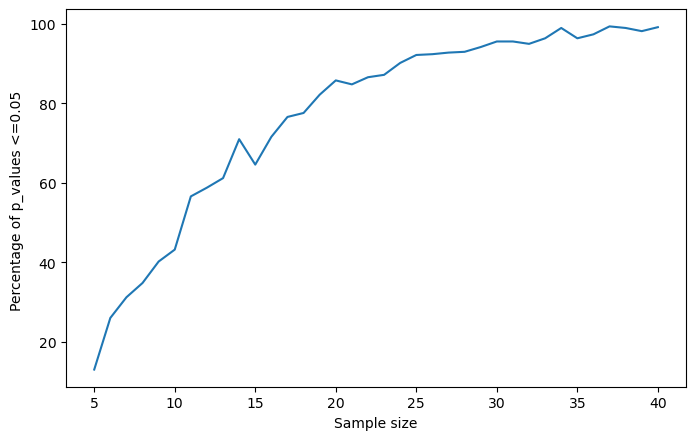

In [53]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(N, significant_values)
plt.xlabel('Sample size')
plt.ylabel('Percentage of p_values <=0.05 ')


In [61]:
#suitable value of N where our alternative hypothesis will be 90% correct

suitable_sampleSize= []
for key,value in experimentDict.items():
    if value >= 90.00:
        suitable_sampleSize.append(key)
print('suitable value of N where our alternative hypothesis will be 90% correct are')
print(suitable_sampleSize)


suitable value of N where our alternative hypothesis will be 90% correct are
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [60]:
#to check for N = 25

import random
import numpy as np
np.set_printoptions(precision=3)



class TreatmentTrial(object):
    '''
    this class will take an input of N sample size 
    for each sample according to set probability will determine 
    if the pig gets infected or not for both
    control group (untreated) and treatment group(treated)
    then will return an observed value by subtracted mean from each group
    
    
    '''
    
    def __init__(self,N):
        self.N = N

    
    def treated_prob(self):
         treated_n = []
         for i in range(self.N):
              infection_probability = np.random.random()
              if infection_probability <= 0.1:
                  treated_n.append(1)
              else:
                  treated_n.append(0)
                  
         treated_N = np.array(treated_n)
         return treated_N
                  
          
    def untreated_prob(self):
         untreated_n = []
         for i in range(self.N):
              infection_probability = np.random.random()
              if infection_probability <= 0.5:
                  untreated_n.append(1)
              else:
                  untreated_n.append(0)
                  
         untreated_N = np.array(untreated_n)
         return untreated_N


    def observedStat(self,treated_N,untreated_N):
        
        observed_statValue = abs(treated_N.mean() - untreated_N.mean())
        return observed_statValue
        




# need to sample two random subdivisions multiple times
class randomTrials:
    '''
    this class is to compute random statistics value by
    bootstraping the data of treatment and control group
    '''
    
    def __init__(self, group_one, group_two):
        self.n_one = group_one.size # number of samples in group one
        self.n_two = group_two.size # same for group two
        self.n_all = self.n_one + self.n_two # size of the data
        self.all = np.concatenate((group_one, group_two), axis=0) # merged data
        
    def generate_random_split(self):
        temp = self.all.copy() # copy to avoid corruption by user
        np.random.shuffle(temp) # now the columns are shuffled
        go = temp[:self.n_one] # group one
        gt = temp[self.n_one:] # group two
        return (go, gt)



def experiment_call(N):
    #a global function call for the entire trial experiment for each value of N
    #this will return us a p value for each run of N
    experiment = TreatmentTrial(N)
    treatmentGroup = experiment.treated_prob()
    controlGroup = experiment.untreated_prob()  
    observedValue = experiment.observedStat(treatmentGroup,controlGroup)

    trials = 10000#FOR RANDOM STATISTICS TO CALCULATE P VALUE BY PCR
    rg = randomTrials(treatmentGroup, controlGroup) # feed data to object
    random_statistics = np.zeros(trials)
    for i in range(trials):
         go, gt = rg.generate_random_split()
         random_statistics[i] = go.mean() - gt.mean()
    

    p_value = np.sum(random_statistics >= observedValue) / random_statistics.size
    return p_value    
    


p_values = []
experiment_runs = 10000
for x in range(experiment_runs):
          p_values.append(experiment_call(N = 25))
            
count = 0
for i in p_values:
    if i <= 0.05:
        count+=1
print('out of 10,000 trials with N= 25, the sample had significance p_value <= 0.05', round(count/experiment_runs*100,2),'%',  'of times')

out of 10,000 trials with N= 25, the sample had significance p_value <= 0.05 90.89 % of times


Thus, N=25 will be a good sample size where 90% of time you can reject the null hypothesis because with N= 24 although with 500 trials it gave a value of 90% and above but with 10,000 trials it came down to 89% that is why i tested with second best value N= 25 and it gave 90% vzlue above regardless of trial run number.